In [25]:
import create_data
import kmeans
import voltage
import os
import importlib

In [26]:
importlib.reload(voltage)

<module 'voltage' from 'C:\\Users\\avigh\\Documents\\python\\VoltageDimentionalReduction\\voltage.py'>

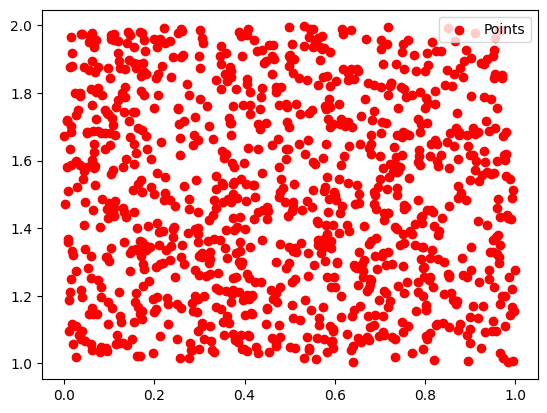

In [27]:
square_data = create_data.Data("square_fill.json", stream=False)
square_data.plot()

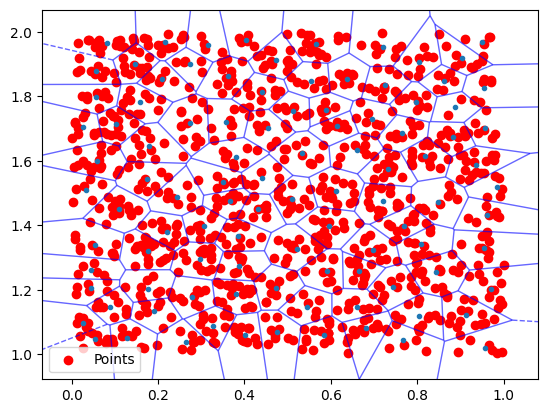

In [28]:
k = 100

partitions = kmeans.Partitions(square_data)
partitions.k_means(k, seed=time.time())

partitions.plot()

In [29]:
def getClosestTo(l, point):
    most_central_index = 0
    for index in range(len(l)):
        if distance(l[index], point) < distance(l[most_central_index], point):
            most_central_index = index
    return most_central_index

# landmarks = [Landmark(getClosestTo(partitions.centers, [0, 0]), 1), Landmark(getClosestTo(partitions.centers, [2, 2]), 0)]
landmarks = [voltage.Landmark(getClosestTo(partitions.centers, [0.5, 1.5]), 1)]

# print(partitions.centers[most_central_index])

In [56]:
solver = voltage.Solver(square_data)
solver.setWeights(kernel=voltage.radialkernel, c=0.05)
solver.addUniversalGround(p_g=0.000001)
solver.addLandmarks(landmarks)
solver.compute_voltages()

array([0.45279031, 0.45600004, 0.51667332, 0.47331026, 0.45558975,
       0.49273097, 0.60924946, 0.46067754, 0.55055409, 0.51391092,
       0.46876503, 0.57579299, 0.59778178, 0.4991308 , 0.60516061,
       0.73478923, 0.45257326, 0.4754584 , 0.47382086, 0.49760004,
       0.58258993, 0.44468168, 0.54529838, 0.47755181, 0.46990272,
       0.45479958, 0.71448344, 0.46973642, 0.46080188, 0.45464533,
       0.47820899, 0.45927197, 0.46990272, 0.51287215, 0.49341793,
       0.46838523, 0.59271232, 0.45648306, 0.48365793, 0.5963569 ,
       0.45813494, 0.49112889, 0.52973022, 0.61362571, 0.45900498,
       0.71429895, 0.59283773, 0.45503083, 0.4844781 , 0.47686392,
       0.46139205, 0.45593165, 0.55771597, 0.47426901, 0.74436374,
       0.47871833, 0.61749123, 0.45026543, 0.51409848, 0.69318461,
       0.47072453, 0.45717703, 0.52309588, 0.62427624, 0.45691232,
       0.52274496, 1.        , 0.46643335, 0.48944539, 0.47813252,
       0.45595021, 0.57668148, 0.46129099, 0.59452014, 0.45568

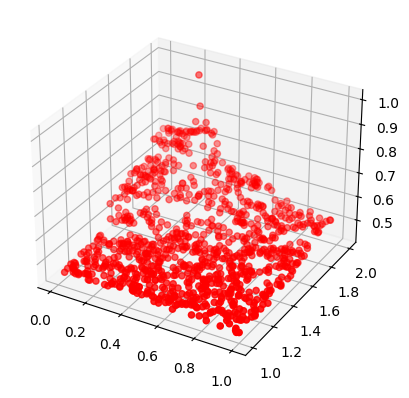

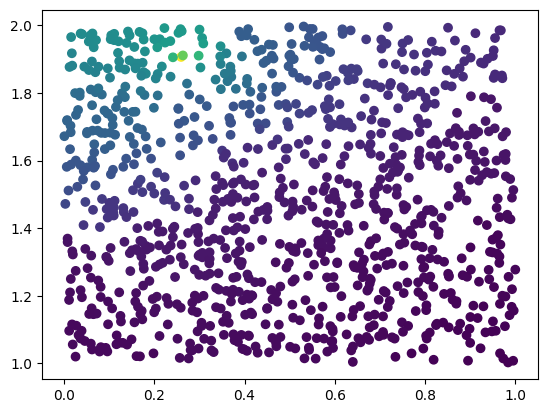

<Axes: >

In [57]:
solver.plot(colored=False)
solver.plot(colored=True)

In [83]:
# c = bestCFinder(radialkernel, landmarks, partitions)

landmarkSolver = Solver(partitions.centers)
landmarkSolver.setWeights(kernel=voltage.gaussiankernel, c=0.03)
landmarkSolver.addUniversalGround(p_g=0.000001)
landmarkSolver.addLandmarks(landmarks)
landmarkSolver.compute_voltages()

array([0.45353954, 0.69415723, 0.31157922, 0.28522983, 0.26645062,
       0.85471277, 0.47763676, 0.31217104, 0.40513342, 0.27351213,
       0.63666109, 0.37471299, 0.34938047, 0.30659679, 0.30803348,
       0.43198027, 0.32580911, 0.30375146, 0.39117569, 0.37233883,
       0.45231423, 0.5689154 , 0.36780982, 0.28580975, 0.44364738,
       0.310998  , 0.87960227, 0.35556033, 0.31172158, 0.29530045,
       0.28881444, 0.30655997, 0.45416944, 0.40688519, 0.3996751 ,
       0.5026371 , 0.66094488, 0.36926844, 0.30410212, 0.32014596,
       0.28196357, 0.42809942, 0.29847132, 0.30517453, 0.32693522,
       0.32836237, 0.69440644, 0.3347193 , 0.39602287, 0.40662833,
       0.61809835, 0.45521971, 0.31923651, 0.43052426, 0.30494629,
       0.27157419, 0.28430739, 0.52426509, 0.37189101, 0.35551395,
       0.30321186, 0.39423349, 0.29342453, 0.46489921, 0.40517959,
       0.85774356, 1.        , 0.31526045, 0.66495322, 0.30778915,
       0.327211  , 0.43298856, 0.39742084, 0.30574335, 0.40621

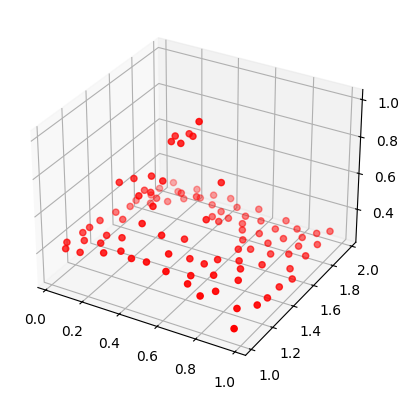

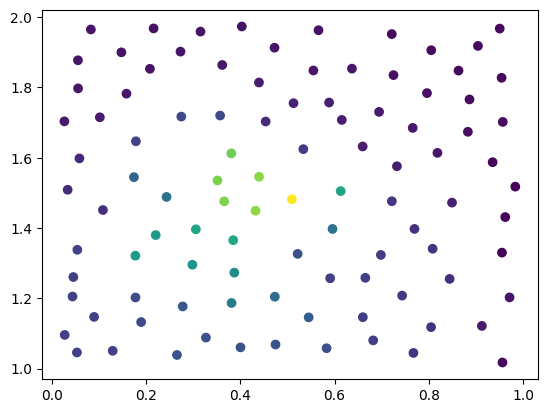

<Axes: >

In [84]:
landmarkSolver.plot(colored=False)
landmarkSolver.plot(colored=True)

In [33]:
voltages = [0 for i in range(len(data))]

for index in range(k):
    closestIndicies = partitions.getClosestPoints(index)
    closeLandmarksIndicies = []

    for pair in partitions.voronoi.ridge_points:
        if pair[0] == index:
            closeLandmarksIndicies.append(pair[1])
        if pair[1] == index:
            closeLandmarksIndicies.append(pair[0])

    closeLandmarks = []
    for cli in closeLandmarksIndicies:
        closeLandmarks.append(Landmark(cli, landmarkVoltages[cli]))

    localSolver = Solver(data.getSubSet(closestIndicies))
    localSolver.setWeights(kernel=gaussiankernel, c=c)
    localSolver.addLandmarks(closeLandmarks)
    localVoltages = localSolver.compute_voltages()

    for i, v in zip(closestIndicies, localVoltages):
        voltages[i] = v

TypeError: 'generator' object is not subscriptable

In [ ]:
temp = Solver(data)
temp.voltages = voltages
%matplotlib widget
temp.plot()

In [ ]:
line_data = create_data.Data("line.json", stream=True)
n = len(line_data)

X0 = []
X1 = []

for index, point in enumerate(line_data):
    if point[0] < 1:
        X0.append(voltage.Landmark(index, 0))
    if point[0] > 2:
        X1.append(voltage.Landmark(index, 1))

In [ ]:
ungrounded = voltage.Solver(line_data)
ungrounded.setWeights(kernel=voltage.gaussiankernel, c=0.03)
ungrounded.addLandmarks(X0)
ungrounded.addLandmarks(X1)
voltages = ungrounded.compute_voltages()

ax = ungrounded.plot(color='r', label="Ungrounded Points")

In [ ]:
grounded = voltage.Solver(line_data)
grounded.setWeights(kernel=voltage.gaussiankernel, c=0.3)
grounded.addUniversalGround()
grounded.addLandmarks(X1)
grounded_voltage = grounded.compute_voltages()

ax = grounded.plot(color='b', label="Grounded Points")